#### 【 지도학습 - 회기 】
- 회귀(Regression): 수치값을 예측하는 학습
    * 예: 거리, 시간, 무게, 집가격 등등...

- 주제: 공부 시간과 과외횟수에 따른 점수 예측
- 방법: Linear Model 계열의 LinearRegression

[1] 모듈 로딩 및 데이터 준비<hr>

In [ ]:
## ===============================================================
## [1-1] 모듈 로딩
## ===============================================================
## 기본 모듈
import pandas as pd
import numpy as np

## 시각화 관련 모듈
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 데이터셋 및 학습관련 모듈
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## ML 모델 성능지표 관련 모듈
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score

## Cow 활성화: 복사와 공유 자동 설정 사능 활성화
pd.options.mode.copy_on_write = True

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

In [3]:
## ===============================================================
## [1-2] 데이터 준비 및 확인
## ===============================================================
## 데이터 준비
hour = [1, 2, 3, 5, 7, 8, 10]
count = [0, 0, 1, 1, 2, 2, 1]
score = [15, 32,45,55,60,73,91]

## 공부시간과 과외횟수, 성적 데이터 셋
dataDF = pd.DataFrame({'Hour':hour, 'Count': count, 'Score':score})
dataDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hour    7 non-null      int64
 1   Count   7 non-null      int64
 2   Score   7 non-null      int64
dtypes: int64(3)
memory usage: 300.0 bytes


C:\Users\keyin\AppData\Local\Temp\ipykernel_24224\2409826820.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


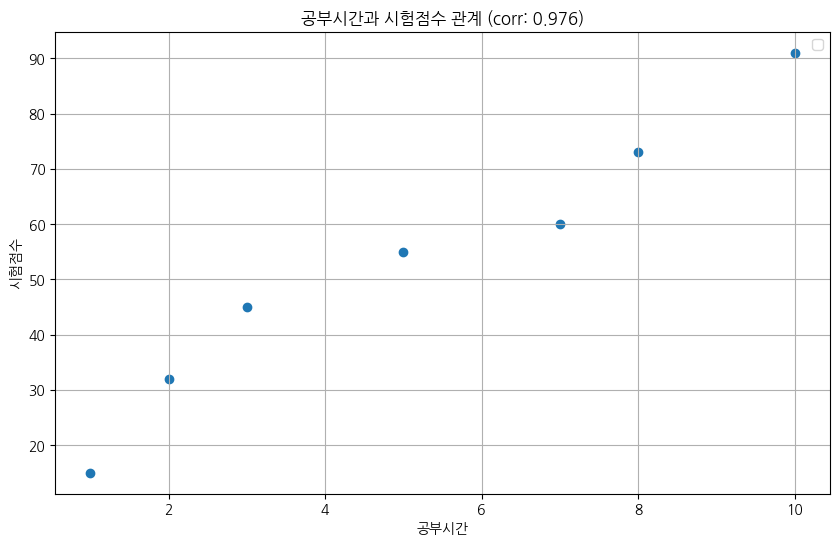

In [4]:
## ===============================================================
## 공부시간과 과외횟수 성적관계 시각화 => Linear Model로써 
##                          피쳐와 타겟 선형 관계성
## ===============================================================
## => 상관관계 계산: [기] person(피어슨) -> 피처와 타겟의 직선의 선형성

corr_ = dataDF.corr(numeric_only=True)['Score']
corr_value = corr_['Hour']

plt.figure(figsize=(10,6))
plt.scatter(dataDF.Hour, dataDF.Score)
plt.xlabel('공부시간')
plt.ylabel('시험점수')
plt.grid()
plt.title(f"공부시간과 시험점수 관계 (corr: {corr_value:.3f})")
plt.legend()
plt.show()

[2] 피쳐와 타겟/학습용과 테스트용 분리<hr>

In [83]:
dataDF.head()

,Hour,Score
0,1,15
1,2,32
2,3,45
3,5,55
4,7,60


In [6]:
## [2-1] 피쳐(2D)와 타겟(1D) 분리
featureDF = dataDF[dataDF.columns[0:-1]]        ## dataDF[['Hour', 'Count']]
targetSR = dataDF[dataDF.columns[-1]]            ## dataDF['Score']

print(f'featureDF : {featureDF.shape},  targetSR : {targetSR.shape}  ')
featureDF.head(1)


featureDF : (7, 2),  targetSR : (7,)  


,Hour,Count
0,1,0


In [9]:
## [2-2] 학습용과 테스트용 분리: 회귀 시에는 stratify 필요 없음
##                           분류 시에는 클래스/라벨별 비율 설정을 위해서 stratify 필요!!
x_train, x_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetSR, 
                                                    test_size=0.2,
                                                    random_state=10)

print(f'[TRAIN] x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'[TEST] x_test: {x_test.shape}, y_train: {y_test.shape}')


[TRAIN] x_train: (5, 2), y_train: (5,)
[TEST] x_test: (2, 2), y_train: (2,)


[3] 학습 진행 <hr>


In [8]:
## 모델 인스턴스 생성
lrModel = LinearRegression()
lrModel

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
## 학습 진행 => 학습용 데이터셋만 사용 ==> 시험점수 = 공부시간*W2 + 과외횟수*W1 + W0 
lrModel.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
## 학습 후 학습용데이터셋 기반 모델 파라미터 설정
## - 모델 파라미터: 파라미터 이름_ => 피쳐에 곱해지는 가중치 W, 결과 미세조정 절편 bias

print('가중치 coef_:', lrModel.coef_)
print('절편 intercept_:', lrModel.intercept_)
print('feature_names_ in: ', lrModel.feature_names_in_)
print('n_features_in_: ', lrModel.n_features_in_)

print('선형식 즉, 모델: ', f'{lrModel.coef_[0]:.3f} * 공부시간 + {lrModel.coef_[1]:.3f} * 과외횟수 + {lrModel.intercept_}')

가중치 coef_: [ 15.833333 -26.      ]
절편 intercept_: 0.1666666666666714
feature_names_ in:  ['Hour' 'Count']
n_features_in_:  2
선형식 즉, 모델:  15.833 * 공부시간 + -26.000 * 과외횟수 + 0.1666666666666714


[4] 성능평가 <hr>

In [89]:
## 훈련용 성능평가 & 테스트용 성능평가 비교
train_score = lrModel.score(x_train, y_train)
test_score = lrModel.score(x_test, y_test)

print(f'[train_score] {train_score}')
print(f'[test_score] {test_score}')

[train_score] 0.955795888267711
[test_score] 0.8935221976774963


[5] 예측: 새로운 데이터 사용<hr>
- predict(2D_새로운 피쳐) ==> 예측 무게 값
- n_neighbors의 무게를 추출 => 평균한 값과 예측 무게값이 같은지 체크

In [90]:
newDF = pd.DataFrame([ [4.3] ], columns=dataDF.columns[0:1])
newDF


,Hour
0,4.30000


In [91]:
## 선형식 값들
lr_score = lrModel.predict(pd.DataFrame([[1],[11]], columns=dataDF.columns[0:1]))

[pre_score] [44.766129]     44.766129032258064


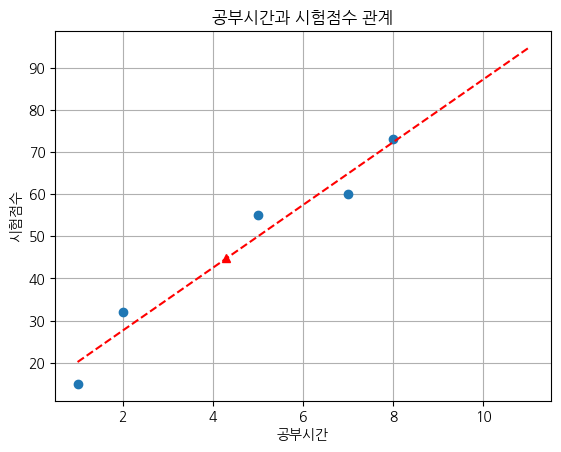

In [94]:
## 예측값 추출
pre_score = lrModel.predict(newDF)
print(f'[pre_score] {pre_score}     {lrModel.coef_[0] * 4.3 + lrModel.intercept_}')

## => 시각화
## 학습 데이터 
## x와 y사 만나 지점을 이어서 연결하면 선 그래프
## [기] 선 그래프
## [설] 마크 '마크형태' => 'o', '^', '<', '>'
plt.plot(x_train.Hour, y_train, 'o')       ## 'colormarkerlinestyle'

## 선형식 그래프
plt.plot([1, 11], lr_score, 'r--')

## 새로운 데이터
plt.plot(newDF.Hour, pre_score, 'r^')

plt.xlabel('공부시간')
plt.ylabel('시험점수')
plt.grid()
plt.title(f"공부시간과 시험점수 관계")
plt.show()



In [93]:
print(x_train.iloc[[0,1]], end = '\n\n')     ## DF => 위치인덱스
print(x_train.loc[[10092,87]], end = '\n\n') ## DF => 라벨인덱스
print(y_train.iloc[0], y_train.loc[10092], y_train[10092])

print("--------------------------")
print('\nx_train.index', x_train.index, sep = '\n')
print('\ny_train.index', y_train.index, sep = '\n')

   Hour
0     1
3     5



KeyError: "None of [Index([10092, 87], dtype='int64')] are in the [index]"

NameError: name 'indices' is not defined

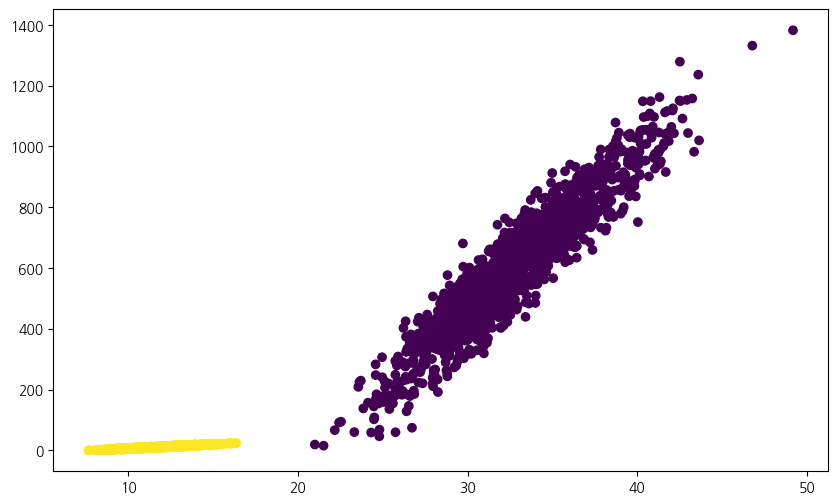

In [ ]:
plt.figure(figsize=(10,6))
## -> 기존 데이터셋
plt.scatter(dataDF['Length'], dataDF['Weight'],c=dataDF.Species.cat.codes)

## -> 새로운 데이터 [ 20 ] => 예측 무게[0]
for idx in range(5):
    n_idx = indices[idx].tolist()

    plt.scatter(newDF.iloc[idx], pre_weight[idx], c='r')
    plt.scatter(x_train.iloc[n_idx], y_train.iloc[n_idx], c='green')

    print(f'[{idx}] pre_weights: {pre_weight[idx]}')
    print(f'calc: {y_train.iloc[n_idx].sum()/5:.5f}')
    


    
plt.xlabel('길이')
plt.ylabel('무게')
plt.grid()
plt.title(f"길이와 무게에 따른 생선 무게")
plt.legend()
plt.show()